<a href="https://colab.research.google.com/github/KudryashovDmitry/PDA_SOL/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2_dataS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime as DT
from matplotlib.dates import date2num
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
columns='Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON'.split(',')
df = pd.read_csv('/content/drive/MyDrive/Практическая работа 2/global_temps.csv', names=columns)
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1881,-0.20,-0.15,0.03,0.05,0.05,-0.19,0.00,-0.04,-0.16,-0.22,-0.19,-0.08,-0.09,-0.10,-0.18,0.04,-0.08,-0.19
1,1882,0.16,0.13,0.04,-0.16,-0.14,-0.22,-0.17,-0.08,-0.15,-0.24,-0.17,-0.36,-0.11,-0.09,0.07,-0.09,-0.16,-0.19
2,1883,-0.30,-0.37,-0.13,-0.19,-0.18,-0.08,-0.08,-0.14,-0.23,-0.12,-0.24,-0.11,-0.18,-0.20,-0.34,-0.17,-0.10,-0.20
3,1884,-0.13,-0.09,-0.37,-0.40,-0.34,-0.35,-0.31,-0.28,-0.28,-0.25,-0.34,-0.31,-0.29,-0.27,-0.11,-0.37,-0.32,-0.29
4,1885,-0.59,-0.34,-0.27,-0.42,-0.45,-0.44,-0.34,-0.32,-0.29,-0.24,-0.24,-0.11,-0.34,-0.35,-0.41,-0.38,-0.36,-0.25


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    142 non-null    int64  
 1   Jan     142 non-null    float64
 2   Feb     142 non-null    float64
 3   Mar     142 non-null    float64
 4   Apr     142 non-null    float64
 5   May     142 non-null    float64
 6   Jun     142 non-null    float64
 7   Jul     142 non-null    float64
 8   Aug     142 non-null    float64
 9   Sep     142 non-null    float64
 10  Oct     142 non-null    float64
 11  Nov     142 non-null    float64
 12  Dec     142 non-null    float64
 13  J-D     142 non-null    float64
 14  D-N     142 non-null    float64
 15  DJF     142 non-null    float64
 16  MAM     142 non-null    float64
 17  JJA     142 non-null    float64
 18  SON     142 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.2 KB


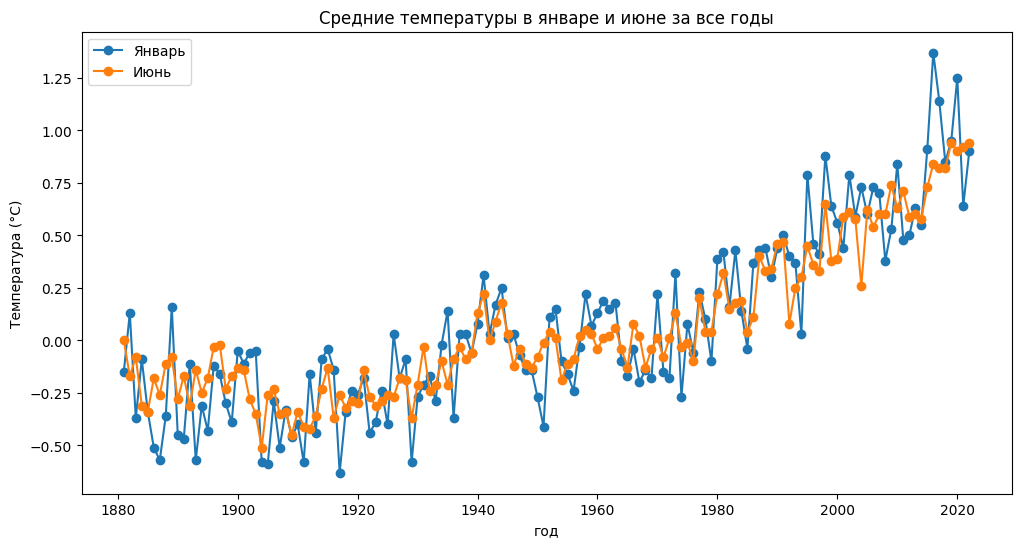

In [95]:

january_temperatures = df.iloc[:, 2]  # Здесь 2 - это индекс столбца с январскими температурами
june_temperatures = df.iloc[:, 7]  # Здесь 7 - это индекс столбца с июньскими температурами

# Список годов
years = df.iloc[:, 0]  # Здесь 0 - это индекс столбца с годами

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(years, january_temperatures, label='Январь', marker='o')
plt.plot(years, june_temperatures, label='Июнь', marker='o')
plt.xlabel('год')
plt.ylabel('Температура (°C)')
plt.title('Средние температуры в январе и июне за все годы')
plt.legend()

plt.show()

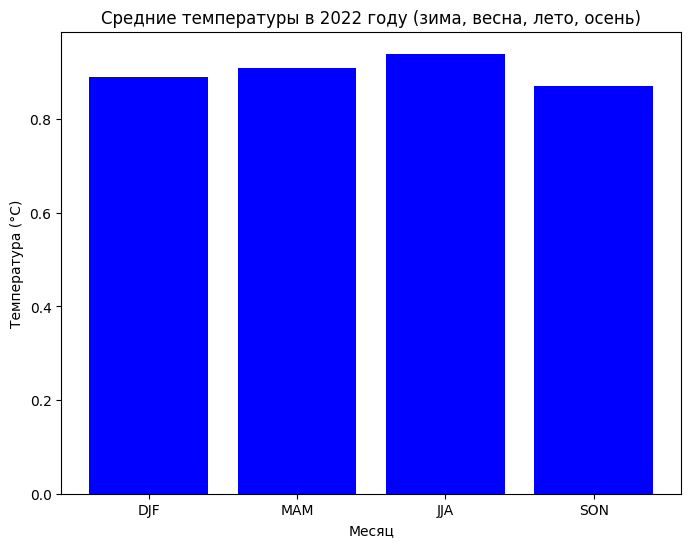

In [96]:
# Столбчатая категорированная диаграмма
selected_months = ['DJF', 'MAM', 'JJA', 'SON']
year_2022_data = df[df['Year'] == 2022]
temperatures_2022 = [year_2022_data[month].values[0] for month in selected_months]
plt.figure(figsize=(8, 6))
plt.bar(selected_months, temperatures_2022, color='b')
plt.xlabel('Месяц')
plt.ylabel('Температура (°C)')
plt.title('Средние температуры в 2022 году (зима, весна, лето, осень)')
plt.show()

(-1.1724482863043801,
 1.1034499183954467,
 -1.1760015516401034,
 1.1036191171028817)

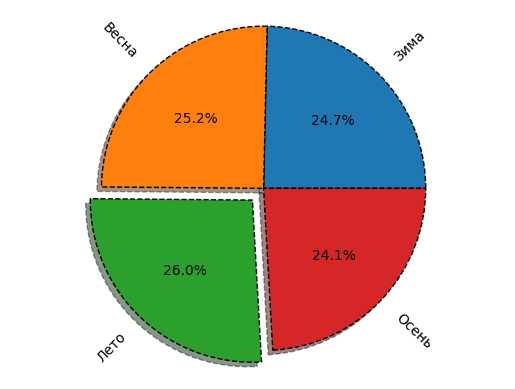

In [97]:
selected_months = ['DJF', 'MAM', 'JJA', 'SON']
year_2022_data = df[df['Year'] == 2022]
vals = [year_2022_data[month].values[0] for month in selected_months]
labels = ['Зима', 'Весна', 'Лето', 'Осень']
explode = (0, 0, 0.1, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True,
explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'},
rotatelabels=True)
ax.axis('equal')

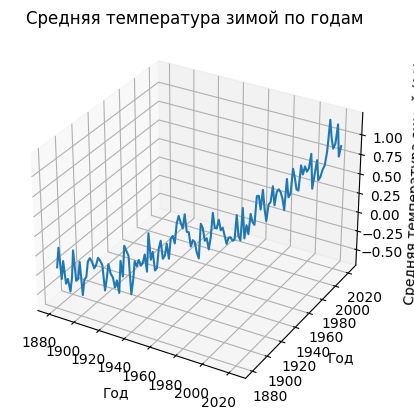

In [116]:
x = years
y = x
z = df['DJF']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='динамика')

# Настройка меток осей
ax.set_xlabel('Год')
ax.set_ylabel('Год')
ax.set_zlabel('Средняя температура зимой (°C)')
ax.set_title('Средняя температура зимой по годам')

plt.show()
